## Анализ эффективности автоматического подбора препаратов
На первом этапе обработки данных происходит автоматический подбор препаратов.  
После этого этапа происходит ручная обработка (генетиками/онкологами/иммунологами и тд).  
В процессе ручной обработки добавлются/удаляются препараты.  
Цель: посмотреть насколько эффективно работает автоматическая аннотация. 


Реализация: сравнивается состав препаратов в двух *json* файлах: аннотационном и релизном.

In [47]:
import toml
import json 
import os
import matplotlib.pyplot as plt
%matplotlib inline

def second_minus_first(first_list, second_list):
    a = []
    for x in second_list:
        if x not in first_list:
            a.append(x)
    return a

def intersection_two_list(first_list, second_list):
    return list(set(first_list) & set(second_list))

count_annotate = []
count_prod = []
prod_minus_annotate = []
prod_and_annotate = []
names = []
cl = []

for i in range(1, 72):
    annotate_name = "annotate_json/OGT-%s_annotate.json" % (str(i))
    prod_name = "prod_json/OGT-%s_prod.json" % (str(i))
    if os.path.exists(annotate_name) and os.path.exists(prod_name):
        with open(annotate_name, 'r') as input_file:
            annotate_file = json.load(input_file)
        with open(prod_name, 'r') as input_file:
            prod_file = json.load(input_file)
            

        print('OGT-%s' % (str(i)))
        names.append('OGT-%s' % (str(i)))
        prod_drugs = []
        annotate_drugs = []
        count_annotate.append(len(annotate_file['Drugs']))
        print("Drugs found in ANNOTATE:   ", len(annotate_file['Drugs']))
        for drug in annotate_file['Drugs']:
            annotate_drugs.append(drug['drugbank_id'])

        count_prod.append(len(prod_file['Drugs']))
        print("Drugs found in PRODUCTION: ", len(prod_file['Drugs']))
        for drug in prod_file['Drugs']:
            prod_drugs.append(drug['drugbank_id'])
        
        inter = intersection_two_list(annotate_drugs, prod_drugs)
        prod_and_annotate.append(len(inter))
        print("PROD & ANNOTATE : ", len(inter))
        
        smf = second_minus_first(annotate_drugs, prod_drugs)
        prod_minus_annotate.append(len(smf))
        print("PROD - ANNOTATE : ", len(smf))
        
        
        count_diff.append(len(smf))
        d = [0, 0, 0, 0]
        for x in smf:
            for y in prod_file['Drugs']:
                if x != y['drugbank_id']:
                    pass
                else:
                    pass
                    if y['approved_in_this_disease'] == "STR_APPROVED_FOR_THIS_DISEASE":
                        d[0] += 1
                    elif y['approved_in_this_disease'] == "STR_APPROVED_FOR_OTHER_DISEASE":
                        d[1] += 1
                    elif y['approved_in_this_disease'] == "STR_IN_RND":
                        d[2] += 1
                    elif y['approved_in_this_disease'] == "":
                        d[3] += 1
                    else:
                        print("FATAL ERROR")
                        exit(0)

        cl.append(d)
        print('')



OGT-6
Drugs found in ANNOTATE:    16
Drugs found in PRODUCTION:  7
PROD & ANNOTATE :  0
PROD - ANNOTATE :  7

OGT-7
Drugs found in ANNOTATE:    12
Drugs found in PRODUCTION:  14
PROD & ANNOTATE :  3
PROD - ANNOTATE :  11

OGT-9
Drugs found in ANNOTATE:    26
Drugs found in PRODUCTION:  16
PROD & ANNOTATE :  5
PROD - ANNOTATE :  11

OGT-10
Drugs found in ANNOTATE:    22
Drugs found in PRODUCTION:  15
PROD & ANNOTATE :  9
PROD - ANNOTATE :  6

OGT-11
Drugs found in ANNOTATE:    26
Drugs found in PRODUCTION:  17
PROD & ANNOTATE :  0
PROD - ANNOTATE :  17

OGT-12
Drugs found in ANNOTATE:    26
Drugs found in PRODUCTION:  8
PROD & ANNOTATE :  2
PROD - ANNOTATE :  6

OGT-13
Drugs found in ANNOTATE:    32
Drugs found in PRODUCTION:  27
PROD & ANNOTATE :  16
PROD - ANNOTATE :  11

OGT-15
Drugs found in ANNOTATE:    35
Drugs found in PRODUCTION:  22
PROD & ANNOTATE :  1
PROD - ANNOTATE :  21

OGT-17
Drugs found in ANNOTATE:    31
Drugs found in PRODUCTION:  19
PROD & ANNOTATE :  0
PROD - ANNOTA

На следующем графике изображен количественный анализ работы автоматического подбора препаратов

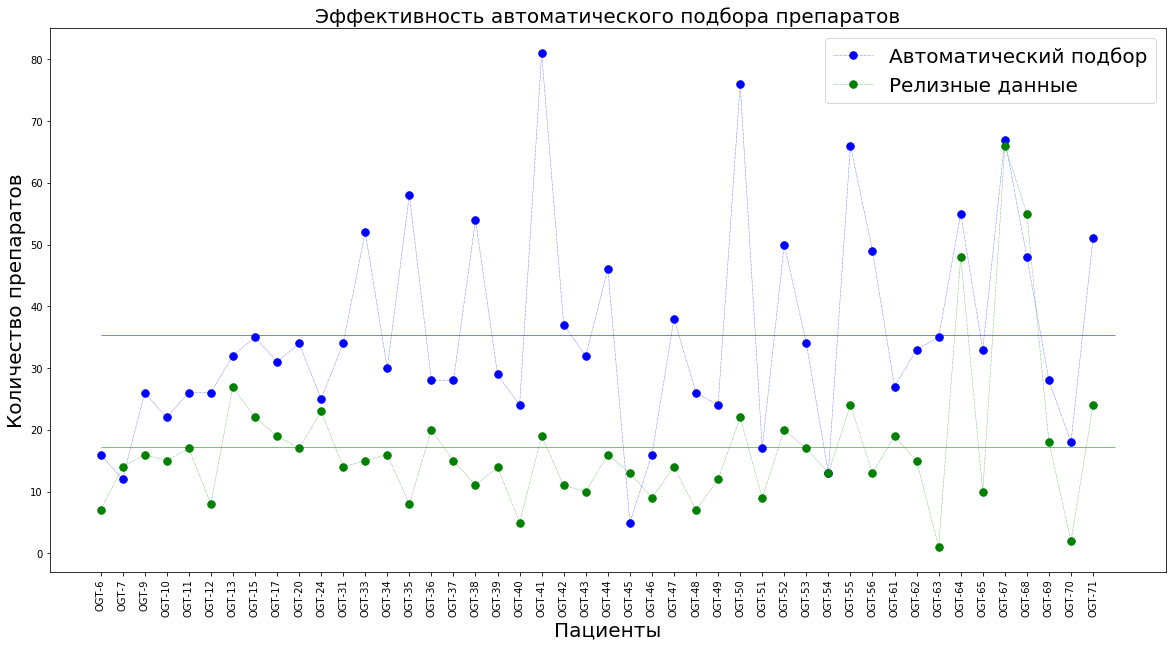

In [48]:
import numpy as np

plt.figure(figsize=(20, 10))
plt.xlabel('Пациенты', size=20)

plt.ylabel('Количество препаратов', size=20)
plt.title('Эффективность автоматического подбора препаратов', size=20)

plt.plot(names, count_annotate, linestyle="dotted", marker='.', markersize=15, linewidth=0.5, color='blue', label='Автоматический подбор')
plt.hlines(np.mean(count_annotate), 0, len(count_prod), linestyle="solid", linewidth=0.5, color='blue')

plt.plot(names, count_prod, linestyle="dotted", marker='.', markersize=15, linewidth=0.5, color='green', label='Релизные данные')  
plt.hlines(np.mean(count_prod), 0, len(count_prod), linestyle="solid", linewidth=0.5, color='green')

plt.xticks(rotation=90)
plt.legend(prop={"size":20})
plt.savefig('quantitative_annotation_performance.png', dpi=200)
plt.show()



На следующем графике смотрим уже не на количество препаратов, а на их качество.  
То есть на то сколько новых препаратов было добавлено вручную, а сколько взято из аннотации.

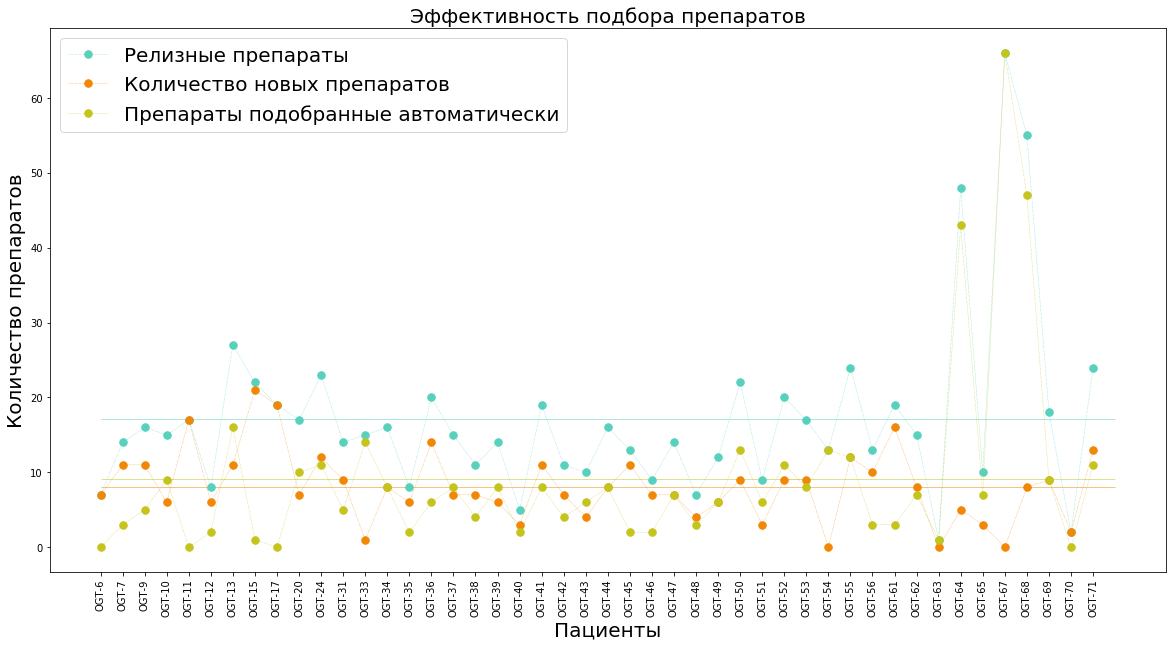

In [49]:
import numpy as np

plt.figure(figsize=(20, 10))
plt.xlabel('Пациенты', size=20)

plt.ylabel('Количество препаратов', size=20)
plt.title('Эффективность подбора препаратов', size=20)

plt.plot(names, count_prod, linestyle="dotted", marker='.', markersize=15, linewidth=0.5, color='#57D1BD', label='Релизные препараты')
plt.hlines(np.mean(count_prod), 0, len(count_prod), linestyle="solid", linewidth=0.5, color='#57D1BD')

plt.plot(names, prod_minus_annotate, linestyle="dotted", marker='.', markersize=15, linewidth=0.5, color='#F28705', label='Количество новых препаратов')  
plt.hlines(np.mean(prod_minus_annotate), 0, len(count_prod), linestyle="solid", linewidth=0.5, color='#F28705')

plt.plot(names, prod_and_annotate, linestyle="dotted", marker='.', markersize=15, linewidth=0.5, color='#C5C41C', label='Препараты подобранные автоматически')  
plt.hlines(np.mean(prod_and_annotate), 0, len(count_prod), linestyle="solid", linewidth=0.5, color='#C5C41C')

plt.xticks(rotation=90)
plt.legend(prop={"size":20})
plt.savefig('qualitative_annotation_performance.png', dpi=200)
plt.show()

Тоже самое, только используется *stacked plot*

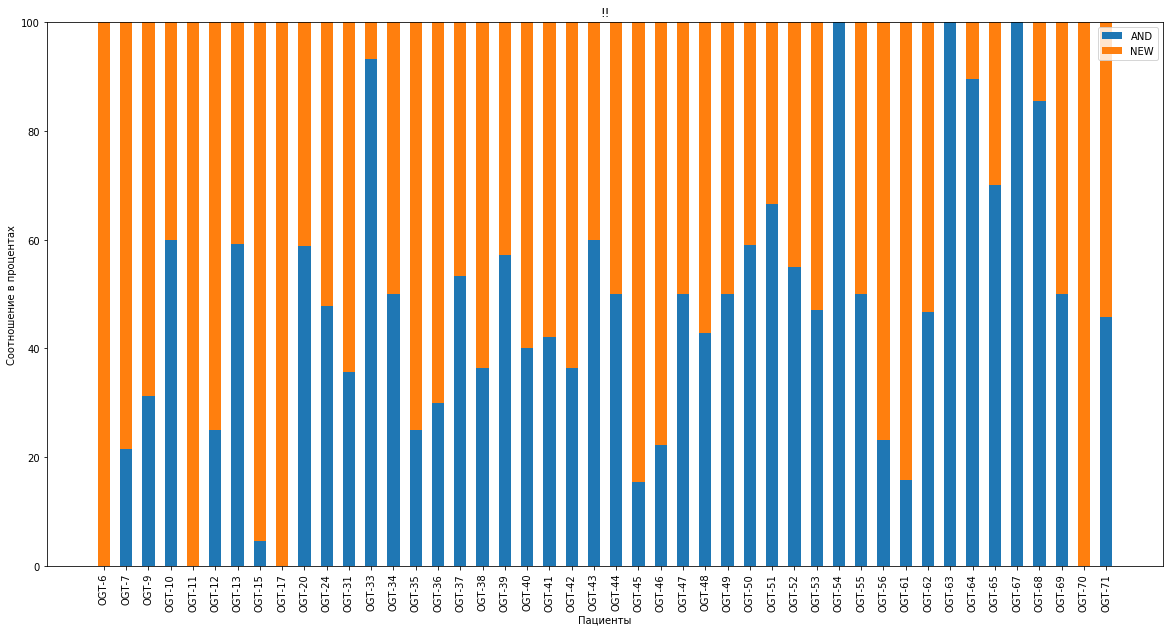

In [52]:
x = np.arange(len(count_annotate))

a = []
b = []
for i in range(len(count_annotate)):
    if count_prod[i] != 0:
        a.append(prod_and_annotate[i] / count_prod[i] * 100)
        b.append(prod_minus_annotate[i] / count_prod[i] * 100)
    else:
        a.append(0)
        b.append(0)
    
width = 0.55       # the width of the bars: can also be len(x) sequence
plt.figure(figsize=(20, 10))
p1 = plt.bar(x, a, width)
p2 = plt.bar(x, b, width, bottom=a)

plt.ylabel('Соотношение в процентах')
plt.xlabel("Пациенты")
plt.title('!!')
plt.xticks(x, names, rotation=90)
plt.legend((p1[0], p2[0]), ('AND', 'NEW'))
plt.savefig("drug_consist.png", dpi=200)
plt.show()


Тут уже смотрится не эффективность работы автоматического подбора терапии, а категории препаратов:
 - эффективны при данном заболевании
 - эффективны при других заболеваниях
 - в исследовании
 - неизвестно

In [54]:
f = open("disease.txt", "r")
disease = []
for line in f:
    disease.append(line[:-1])
d = {}
for elem in disease:
    if elem not in d.keys(): 
        d[elem] = 1
    else:
        d[elem] += 1
{k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse=True)}
        


{'BRCA': 10,
 'PRAD': 7,
 'COADREAD': 5,
 'LUAD': 5,
 'KICH': 3,
 'OV': 2,
 'SI': 2,
 'STAD': 2,
 'GBM': 2,
 'HNSC': 2,
 'UCEC': 1,
 'CHOL': 1,
 'LPS': 1,
 'LIHC': 1,
 'SKCM': 1,
 'AML': 1,
 'MESO': 1,
 'BC': 1}

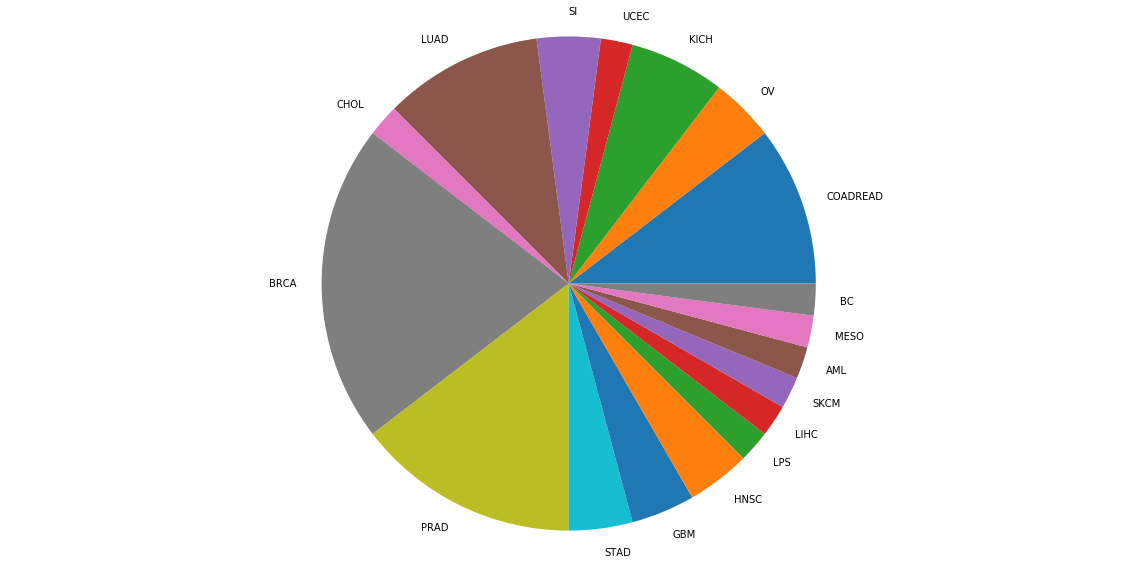

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.pie([x for x in d.values()],labels=[x for x in d.keys()], autopct=None)
plt.axis('equal') 
plt.savefig('pie.png', dpi=200)
plt.show()


In [34]:
print([sum(x) for x in zip(prod_and_annotate, prod_minus_annotate)])
print(prod_)

[7, 14, 16, 15, 17, 8, 27, 22, 19, 17, 23, 14, 15, 16, 8, 20, 15, 11, 14, 5, 19, 11, 10, 16, 13, 9, 14, 7, 12, 22, 9, 20, 17, 13, 24, 13, 0, 19, 15, 1, 48, 10, 66, 55, 18, 2, 24]
